# Giriş

Bu ders ve bir sonraki ders, denetimsiz öğrenme algoritmaları olarak bilinen algoritmaları kullanacağız. Denetimsiz algoritmalar hedef kullanmazlar. Bunun yerine, amaçları verinin bazı özelliklerini öğrenmektir, özelliklerin yapısını belirli bir şekilde temsil etmektir. Tahmin için özellik mühendisliği bağlamında, denetimsiz algoritmayı bir "özellik keşfi(feature discovery)" olarak düşünebilirsiniz.

**Clustering(Kümeleme)**, veri noktalarının birbirlerine ne kadar benzer olduklarına göre gruplara atanması anlamına gelir. Bir kümeleme algoritaması, tabiri caizse "kuşların kendi türleriyle bir araya gelir" gibi bir durum yaratır.

Özellik mühendisliğinde kullanıldığında, bir pazar segmentini temsil eden müşteri gruplarını keşfetmeye çalışabiliriz, örneğin, veya benzer hava koşullarına sahip coğrafi bölgeler. Küme etiketleri özelliğinin eklenmesi, makine öğrenimi modellerinin karmaşık uzamsal veya yakınlık ilişkilerini çözmesine yardımcı olabilir.

# Cluster(Özellik) olarak Küme Etiketleri

kümeleme (clustering) algoritmasının tek bir sürekli (gerçek değerli) özelliğe uygulandığında, geleneksel gruplama (binning) veya ayrıklaştırma (discretization) yöntemine benzer bir rol üstlendiği anlamına gelmektedir. Birden fazla özellikte, bu "çok boyutlu gruplama" (bazen vektör niceleme olarak da adlandırılır) gibidir.
![an Image](https://storage.googleapis.com/kaggle-media/learn/images/sr3pdYI.png)
<center>
<p><b>Sol:</b> Tek özellik kümeleme. <b>Sağ:</b> iki özellik arasında kümeleme</p>
</center>

Veri çerçevesinde eklendiğinde, küme etiketlerinin bir özelliği şöyle görülebilir:

Longitude | Latitude | Cluster
----------|----------|-----------
-93.619   |  42.054  |   3
-93.619 	|42.053 	|3
-93.638 	|42.060 	|1
-93.602 	|41.988 	|0



Bu `küme(Cluster)` özelliğinin kategorik olduğunu unutmamak önemlidir. Burada, tipik kümeleme algoritamasının üreteceği şekilde bir etiket kodlaması(yani bir tamsayı dizisi) ile gösterilmiştir; modelinize bağlı olarak, tekli kodlama daha uygun olabilir.

Küme etiketleri eklemenin ardındaki motivasyon, kümelerin özellikler arasındaki karmaşık ilişkileri daha basit parçalara ayırmasıdır. Böylece modelimiz, karmaşık bütünün tamamını bir kerede öğrenmek yerine, daha basit parçaları tek tek öğrenebilir. Bu, "böl ve fethet" stratejisidir.

![an image](https://storage.googleapis.com/kaggle-media/learn/images/rraXFed.png)
<center>
  <p>YearBuilt özelliğini kümeleme, bu doğrusal modelin SalePrice ile olan ilişkisini öğrenmesine yardımcı olur.</p>
</center>

Şekil, kümelemenin basit bir doğrusal modeli nasıl iyileştirebileceğini göstermektedir. YearBuilt ve SalePrice arasındaki eğri ilişki bu tür bir model için çok karmaşıktır - yetersiz kalmaktadır. Ancak daha küçük parçalarda ilişki neredeyse doğrusal ve model kolayca öğrenebilir.

# k-Means Clustering(k-means Kümeleme)

Çok sayıda kümeleme algoritamsı vardır. Bunlar temel olarak "benzerlik" veya "yakınlık" ölçümünde ve hangi özelliklerle çalıştıklarında farklılık gösterir. Kullanacağımız algoritma olan k-means, sezgiseldir ve özellik mühendisliği bağlamında uygulaması kolaydır. Uygulamanıza bağlı olarak başka bir algoritma daha uygun olabilir.


Çekim Alanları (Radiating Circles): K-Means algoritmasında, her bir küme merkezi (centroid) etrafına giderek büyüyen hayali bir çekim alanı (daireler/küreler) yayar. Her veri noktası, ilk olarak temas ettiği (yani en yakın olduğu) centroid'in kümesine atanır.

Sınır Çizgileri (The Line): İki farklı centroid'in çekim alanları (daireleri) birbiriyle kesiştiğinde, tam kesişme noktasında bir sınır çizgisi oluşur. Bu sınır çizgisi, iki centroid'e eşit mesafede olan tüm noktaları ayırır.

Voronoi Döşemesi (Voronoi Tessellation): Tüm centroid'ler arasındaki bu sınır çizgileri bir araya gelerek veri uzayını parçalara ayırır. Bu parçalanmış yapıya Voronoi Döşemesi denir.

Öğrenilen Şey: K-Means algoritmasının eğitim verisinden öğrendiği şey, aslında bu Voronoi Döşemesidir. Bu döşeme, algoritmanın karar sınırlarını temsil eder ve gelecekteki yeni bir veri noktasının hangi kümeye atanacağını (yani hangi bölgeye düşeceğini) gösterir.

Yukarıdaki Ames veri setindeki kümeleme, k-means kümelemesidir. Aşağıda, tessellation ve merkezler gösterilen aynı şekil yer almaktadır.
<center>
  <img src="https://storage.googleapis.com/kaggle-media/learn/images/KSoLd3o.jpg">
  <p>K-means kümeleme, özellik uzayının voronoi mozaiklemesini oluşturur.</p>
</center>


K-means algoritmasının kümeleri nasıl öğrendiğini ve bunun özellik mühendisliği için ne alama geldiğini inceleyelim. Scikit-learn uygulamasından üç parametreye odaklanacağız: `n_clusters`, `max_iter` ve `n_init`.

Bu, iki adımlı basit bir işlemdir. Algoritma, önceden tanımlanmış bir sayı (n_clusters) merkez noktasını rastgele başlatarak başlar. Ardından bu iki işlemi tekrarlar.

1. en yakın küme merkezine puan atama
2. her bir merkez noktasını, noktalarla arasındaki mesafeyi en aza indirecek şekilde hareket ettirme

Merkezler artık hareket etmeyi bırakana kadar veya maksimum yineleme sayısı (`max_iter`) geçene kadar bu iki adımı tekrarlar.

Merkezlerin başlangıçtaki rastgele konumları genellikle kötü bir kümelenmeyle sonuçlanır. Bu nedenle algoritma birkaç kez (n_init) tekrarlanır ve her nokta ile merkez noktası arasındaki toplam mesafenin en az olduğu kümelemeyi, yani en uygun kümelemeyi döndürür.

Aşağıdaki animasyon, algoritmanın işleyişini göstermektedir. Sonucun başlangıç merkezlerine bağlılığını ve yakınsama sağlanana kadar yinelemenin önemini göstermektedir.

<center>
  <img src="https://storage.googleapis.com/kaggle-media/learn/images/tBkCqXJ.gif">
  <p>New York'taki Airbnb kiralamalarında K-means kümeleme algoritması.</p>
</center>

Çok sayıda küme için `max_iter` değerini veya karmaşık bir veri kümesi için `n_init` değerini artırmanız gerekebilir. Genellikle, kendiniz seçmeniz gereken tek parametre `n_clusters`(k, yani) parametresidir. Bir dizi özellik için en iyi bölümleme, kullandığınız modele ve tahmin etmeye çalıştığınız şeye bağlıdır, bu nedenle herhangi bir hiperparametre gibi (örneğin çapraz doğrulama yoluyla) ayarlamak en iyisidir.

# Örnek - California Housing

Mekansal özellikler olarak, [_California Housing_](https://www.kaggle.com/camnugent/california-housing-prices)'in `'Enlem(Latitude)'` ve `'Boylam(Longitude')'` özellikleri k-means kümeleme için doğal adaylardır. In this example we'll cluster these with `'MedInc'` (median income) to create economic segments in different regions of California.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


plt.style.use('seaborn-v0_8')
plt.rc('figure', autolayout=True)
plt.rc('axes',
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=18)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/housing.csv')
X = df.loc[:, ['MedInc','Latitude', 'Longitude', ]]
X.head()


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


K-means kümeleme ölçeğe duyarlı olduğundan, aşırı değerlere sahip verileri yeniden ölçeklendirmek veya normalleştirmek iyi bir fikir olabilir. Özelliklerimiz zaten yaklaşık olarak aynı ölçekte olduğundan, bunları olduğu gibi bırakacağız.

In [30]:
# Create cluster feature
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,4


Şimdi bunun ne kadar etkili olduğunu görmek için birkaç grafiğe bakalım. İlk olarak, kümelerin coğrafi dağılımını gösteren bir dağılım grafiği. Algoritma, kıyı bölgelerindeki yüksek gelirli alanlar için ayrı segmentler oluşturmuş gibi görünüyor.

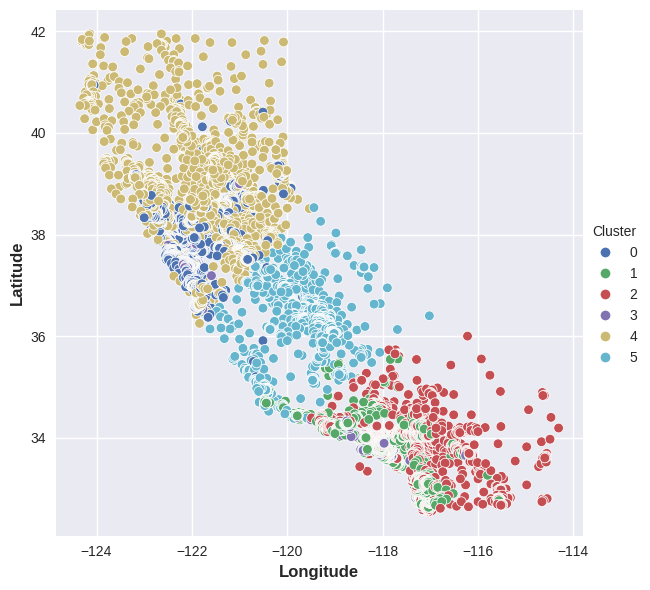

In [31]:
sns.relplot(x="Longitude", y="Latitude", hue="Cluster", data=X, height=6);

Bu veri kümesindeki hedef `MedHouseVal`'dir (medyan ev değeri). Bu kutu grafikleri, her bir küme içindeki hedefin dağılımını göstermektedir. Kümeleme bilgilendirici ise, bu dağılımlar çoğunlukla MedHouseVal boyunca ayrılmalıdır ve gerçekten de gördüğümüz budur.

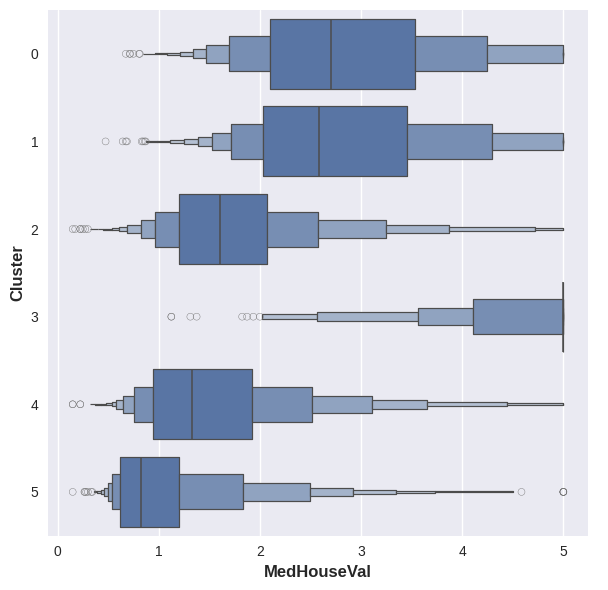

In [33]:
X["MedHouseVal"] = df["MedHouseVal"]
sns.catplot(x="MedHouseVal", y="Cluster", data=X, kind="boxen", height=6);